In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from read_gex_file import *


import numpy as np
import time, copy, os

In [2]:
import emeraldprocessing.pipeline
from emeraldprocessing.tem.culling import cullData, cull_soundings_with_too_few_gates
from emeraldprocessing.tem.utils import remove_empty_soundings


from emeraldprocessing.tem.dataIO import readSkyTEMxyz

In [3]:
#plt.rcParams.update({'font.size': 16})
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Input data processing

In [8]:
root_path=os.getcwd().split('emeraldprocessing')[0]

In [9]:
xyz_file=os.path.join(root_path,'demo_data/Demo.xyz')
alc_file=os.path.join(root_path,'demo_data/SkyTEM_LMZ_HMZ_STD_demo.alc')
gex_file=os.path.join(root_path,'demo_data/Demo.gex')

In [10]:
data, gex = readSkyTEMxyz(xyz_file, alc_file, gex_file)

------- reading SkyTEM xyz data --------------
reading gex file ....
header [General] parsed
header [Channel1] parsed
header [Channel2] parsed
reading xyz file ...
build xyz dictionary .....
.... done!


/Users/mp/Python/EmeraldProcessing/venvEMProcessing/lib/python3.9/site-packages/libaarhusxyz/alc.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(nameorfile, sep=" *= *", header=None).rename(columns={0:"canonical_name", 1:"position"})
/Users/mp/Python/EmeraldProcessing/emeraldprocessing/tem/dataIO.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['flightlines']['DipoleMoment_Ch01']=gex["General"]["NumberOfTurnsLM"] * gex["General"]["TxLoopArea"] * Data['flightlines']['Current_Ch01']
/Users/mp/Python/EmeraldProcessing/emeraldpro

In [11]:
data['flightlines'].iloc[0,:]

fid                     4280591.8
Line                       300201
flight                20230508.01
Date                   2023/05/08
Time                 13:03:11.800
TxPitch                      -5.4
TxRoll                       -0.2
TxAltitude                   45.1
lon                    -40.648301
lat                    -20.756728
UTMX                     328400.2
UTMY                    7703900.6
Topography                   -0.5
alt                          44.6
gdspeed                      74.2
rmf                        -15.55
Magnetic                 23619.03
PowerLineMonitor          110.385
Misc2                45054.543887
Misc1                        45.1
Current_Ch02                109.7
Current_Ch01                  9.0
DipoleMoment_Ch01          3078.0
DipoleMoment_Ch02        150069.6
cull_reason                  none
coverage                        0
TxZ                          44.6
Name: 0, dtype: object

In [14]:
prefix='correct_altitude_and_topo'
xyz_file=os.path.join(root_path,'demo_data/output/'+prefix+'.xyz')
alc_file=os.path.join(root_path,'demo_data/output/'+prefix+'.alc')
gex_file=os.path.join(root_path,'demo_data/output/'+prefix+'.gex')
data2, gex2 = readSkyTEMxyz(xyz_file, alc_file, gex_file)

------- reading SkyTEM xyz data --------------
reading gex file ....
header [General] parsed
header [Channel1] parsed
header [Channel2] parsed
reading xyz file ...
build xyz dictionary .....
.... done!


/Users/mp/Python/EmeraldProcessing/venvEMProcessing/lib/python3.9/site-packages/libaarhusxyz/alc.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(nameorfile, sep=" *= *", header=None).rename(columns={0:"canonical_name", 1:"position"})
/Users/mp/Python/EmeraldProcessing/emeraldprocessing/tem/dataIO.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['flightlines']['DipoleMoment_Ch01']=gex["General"]["NumberOfTurnsLM"] * gex["General"]["TxLoopArea"] * Data['flightlines']['Current_Ch01']
/Users/mp/Python/EmeraldProcessing/emeraldpro

In [15]:
data2['flightlines'].iloc[0]

fid                     4280591.8
Line                       300201
flight                20230508.01
Date                   2023/05/08
Time                 13:03:11.800
TxPitch                      -5.4
TxRoll                       -0.2
TxAltitude                   44.6
lon                    -40.648301
lat                    -20.756728
UTMX                     328400.2
UTMY                    7703900.6
Topography                    0.0
alt                          44.6
gdspeed                      74.2
rmf                        -15.55
Magnetic                 23619.03
PowerLineMonitor          110.385
txz                          44.6
misc2                45054.543887
misc1                        45.1
Current_Ch02                109.7
Current_Ch01                  9.0
DipoleMoment_Ch01          3078.0
DipoleMoment_Ch02        150069.6
cull_reason                  none
coverage                        0
TxZ                          44.6
Name: 0, dtype: object

In [33]:
data2['flightlines'].iloc[0]

fid                     4280591.8
Line                       300201
flight                20230508.01
Date                   2023/05/08
Time                 13:03:11.800
TxPitch                      -5.4
TxRoll                       -0.2
TxAltitude                   45.1
"                      -40.648301
lon                    -20.756728
UTMX                     328400.2
UTMY                    7703900.6
Topography                   -0.5
topography                   44.6
alt                          74.2
gdspeed                    -15.55
Magnetic                 23619.03
PowerLineMonitor          110.385
powerlinemonitor     45054.543887
inuse_ch02_32                 NaN
"misc1                       45.1
Current_Ch02                109.7
Current_Ch01                  9.0
DipoleMoment_Ch01          3078.0
DipoleMoment_Ch02        150069.6
cull_reason                  none
coverage                        0
TxZ                          74.2
Name: 0, dtype: object

In [17]:
# Process data
p = emeraldprocessing.pipeline.ProcessingData(xyz_file, alc_file, gex_file, crs=31984)


------- reading SkyTEM xyz data --------------
reading gex file ....
header [General] parsed
header [Channel1] parsed
header [Channel2] parsed
reading xyz file ...
build xyz dictionary .....
.... done!


/home/mp/Python/simpeg_simpleem/venvSimpleem/lib/python3.8/site-packages/libaarhusxyz/alc.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(nameorfile, sep="= *", header=None).rename(columns={0:"canonical_name", 1:"position"})


In [18]:
p.data['flightlines'].iloc[0,:]

fid                     4280591.8
Line                       300201
flight                20230508.01
Date                   2023/05/08
Time                 13:03:11.800
TxPitch                      -5.4
TxRoll                       -0.2
TxAltitude                   45.1
Misc1                        45.1
lon                    -40.648301
lat                    -20.756728
UTMX                     328400.2
UTMY                    7703900.6
Topography                   -0.5
alt                          44.6
gdspeed                      74.2
rmf                        -15.55
Magnetic                 23619.03
PowerLineMonitor          110.385
Misc2                45054.543887
Current_Ch02                109.7
Current_Ch01                  9.0
DipoleMoment_Ch01          3078.0
DipoleMoment_Ch02        150069.6
cull_reason                  none
coverage                        0
TxZ                          44.6
Name: 0, dtype: object

In [10]:
processing_list=[{'emeraldprocessing.pipeline.cull_roll_pitch_alt':{'max_alt':100, 'max_pitch':12, 'max_roll':12} },
                 {'emeraldprocessing.pipeline.cull_max_slope': {'cull_sounding_tails': True, 'max_slope':0}},
                 {'emeraldprocessing.pipeline.cull_std_threshold': {'std_threshold': 0.2} },
                 {'emeraldprocessing.pipeline.cull_soundings_with_too_few_gates': {'n': 4}},
                 {'emeraldprocessing.pipeline.correct_tilt_pitch_for1D': {'verbose': True}}

                ]

p.process(processing_list)

--------- culling based on roll, pitch and altitude limits --------

time culling roll, pitch, altitude: 0.007710456848144531 sec.
--------- culling max slope --------
time used for slope culling: 0.024918556213378906 sec.

------------- culling based on predefined STD threshold -----------
time used for STD based culling: 0.004361152648925781 sec.

------------ Culling sounding with less than n gates -------------
time used for culling 0.0024085044860839844 sec.

------------ 1D Tilt/pitch correction of the data -------------
time used for 1D correcting the data 0.04802751541137695 sec.


/home/mp/Python/EmeraldProcessing/emeraldprocessing/tem/culling.py:185: RuntimeWarning: invalid value encountered in log10
  timecube=pd.DataFrame(np.tile(np.log10(Data['GateTimes'][moment]), (Data['layer_data'][moment].shape[0], 1)))


In [16]:
p.data['flightlines'].iloc[0,:]

fid                     4280591.8
Line                       300201
flight                20230508.01
Date                   2023/05/08
Time                 13:03:11.800
TxPitch                       0.0
TxRoll                        0.0
TxAltitude                   45.1
Misc1                        45.1
lon                    -40.648301
lat                    -20.756728
UTMX                     328400.2
UTMY                    7703900.6
Topography                   -0.5
alt                          44.6
gdspeed                      74.2
rmf                        -15.55
Magnetic                 23619.03
PowerLineMonitor          110.385
Misc2                45054.543887
Current_Ch02                109.7
Current_Ch01                  9.0
DipoleMoment_Ch01          3078.0
DipoleMoment_Ch02        150069.6
cull_reason                  none
coverage                        0
TxZ                          44.6
Name: 0, dtype: object

In [25]:
data=copy.deepcopy(p.data)
gex=p.gex

In [26]:
data['flightlines'].Line.unique()

array([300201, 300101])

## Here the inversion starts

### Scale data to be in Volt instead of Picovolt
data delivered by SkyTEM is stored in PicoVolt, SimPEG assumes data amplitudes in volt

In [27]:
data['scalefactor']

1e-12

In [28]:
for key in['Gate_Ch01', 'Gate_Ch02']:
    data['layer_data'][key]=data['layer_data'][key] * data['scalefactor']

### Do some culling

set datapoints with `InUseFlag==0` to np.nan

In [29]:
cullData(data)

No scaled data found in data[layer_data]
No scaled data found in data[layer_data]


### Remove sounding locations with little data
here remove location with less then 4 datapoints in both moments

In [30]:
len(data['flightlines'])

341

In [31]:
remove_empty_soundings(data)

Gate_Ch01 has 5 sounding positions without data
Gate_Ch02 has 0 sounding positions without data


In [32]:
data['flightlines'].shape

(341, 27)

### Some plotting of the data that goes into the inversion:

In [38]:
data['layer_data']['InUse_Ch01'].sum()

0       0
1       0
2       0
3       0
4       0
5     336
6     336
7     336
8     336
9     336
10    331
11    329
12    329
13    329
14    329
15    329
16    317
17    305
18    285
19    207
20    173
21    159
22    153
23    146
24    136
25    110
26     90
27     76
dtype: int64

### Here the Simpeg inversion stuff starts

In [46]:
options={"name" : 'demo_inv',
         "workpath" : '/home/mp/Python/EmeraldProcessing/demo_data/inv_output',
         "gate_start_lm" : int(gex['Channel1']['RemoveInitialGates']),
         "gate_end_lm" : 22,
         "gate_start_hm" : int(gex['Channel2']['RemoveInitialGates']),
         "gate_end_hm" : 29,
         "uncertainties_std_data" : 0.03,
         "uncertainties_std_data_override" : False,
         "uncertainties_noise_level_1ms" : 1e-8,
         "uncertainties_noise_exponent" : -0.5,
         "n_layer" : 30,
         "startmodel_res" : 100,
         "thicknesses_type" : "geometric",
         "thicknesses_minimum_dz" : 2,
         "thicknesses_geomtric_factor" : 1.11,
         "thicknesses_sigma_background" : 1/100,
         "simulation_solver" : 'LU',
         "simulation_parallel" : True,
         "simulation_n_cpu" : 7,
         "regularization_alpha_s" : 1e-10,
         "regularization_alpha_r" : 1.0,
         "regularization_alpha_z" : 1.0,
         "directives_logging" : True,
         "directives_save_iterations" : False,
         "directives_seed" : 1,
         "directives_beta0_ratio" : 10,
         "directives_beta_cooling_factor" : 2,
         "directives_beta_cooling_rate" : 1,
         "optimizer_max_iter" : 20,
         "optimizer_max_iter_cg" : 20
         }

In [47]:
inv = utils.make_inversion(data, gex, options)

looks like dual moment data ....
Using estimated data stds
>> Depth from the surface to the base of the bottom layer is 356.8m
Will use Simpeg default (utils.solver_utils.SolverLU)


In [48]:
options['name']

'demo_inv'

In [49]:
options['workpath']

'/home/mp/Python/EmeraldProcessing/demo_data/inv_output'

## Run the inversion

In [50]:
# Run the inversion
start = time.time()
recovered_model = inv.run(inv.invProb.startmodel)
end = time.time()
print("\nTime used for inversion:{0:5.2f} min".format( (end - start)/60))

/home/mp/Python/simpeg_simpleem/venvSimpleem/lib/python3.8/site-packages/discretize/utils/code_utils.py:216: FutureWarning: TensorMesh._cellGradStencil has been deprecated, please use TensorMesh.stencil_cell_gradient. It will be removed in version 1.0.0 of discretize.
  warnings.warn(message, warn)


dm_eigenvalue:7222.135882378881
reg_eigenvalue:500.78171596663014
model has any nan: 0
============================ Inexact Gauss Newton ============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
-----------------------------------------------------------------------------
x0 has any nan: 0
   0  1.44e+02  3.84e+06  0.00e+00  3.84e+06    1.59e+05      0              

                Default solver: SolverDiag is being used in bfgsH0
                
   1  7.21e+01  1.52e+06  6.49e+02  1.57e+06    3.26e+04      0              
   2  3.61e+01  1.02e+06  2.36e+03  1.10e+06    1.19e+04      0   Skip BFGS  
   3  1.80e+01  6.66e+05  6.23e+03  7.78e+05    1.06e+04      0              
   4  9.01e+00  5.06e+05  1.36e+04  6.28e+05    1.83e+04      0              
   5  4.51e+00  3.51e+05  2.13e+04  4.47e+05    3.43e+04      0              
   6  2.25e+00  2.31e+05  2.73e+04  2.92e+05    3.39e+04      0              
   7  1.13e+00  1.59e+05  3.3

## Plot result

In [53]:
logfile=os.path.join(options['workpath'], options['name']+'_log.csv')

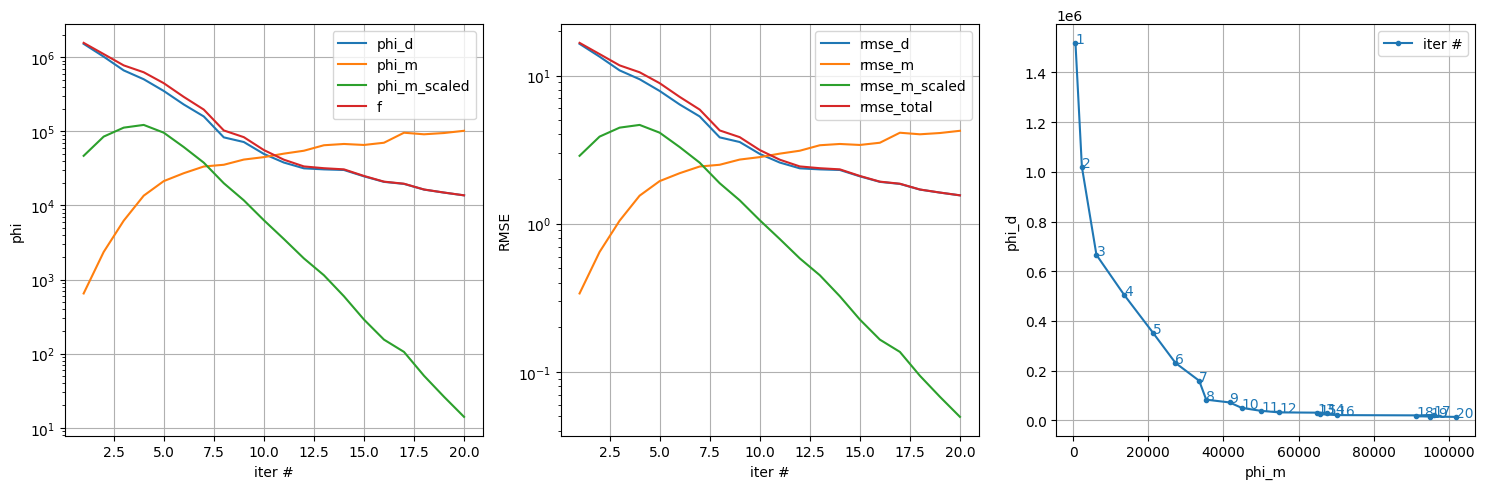

In [54]:
ax,convergence = utils.plot_simpeg_log(logfile)

In [55]:
from emeraldprocessing.tem.plotting import inversionQCplot
from emeraldprocessing.tem.utils import splitData_lines

In [56]:
obs, synth, model = utils.make_output(data, inv)

looks like dual moment data ....
Using synthetic data from the inversion object
Caluclated data errors ...
calculate STDs...
bring things into XYZ shape ... 


/home/mp/Python/SimPEG_ModellingInversion/simpeg_utils/utils.py:50: RuntimeWarning: divide by zero encountered in divide
  std=np.abs(1/inv.invProb.dmisfit.W.diagonal()/inv.invProb.dmisfit.data.dobs)


In [57]:
utils.writePickle_simpeg_inv_results(options['workpath'], options['name'], [obs, synth, model])

Writing: /home/mp/Python/EmeraldProcessing/demo_data/inv_output/demo_inv_dat.pickle
Writing: /home/mp/Python/EmeraldProcessing/demo_data/inv_output/demo_inv_syn.pickle
Writing: /home/mp/Python/EmeraldProcessing/demo_data/inv_output/demo_inv_inv.pickle


In [58]:
obs['flightlines'].columns

Index(['fid', 'Line', 'flight', 'Date', 'Time', 'TxPitch', 'TxRoll',
       'TxAltitude', 'Misc1 ', 'lon', 'lat', 'UTMX', 'UTMY', 'Topography',
       'alt', 'gdspeed', 'rmf', 'Magnetic', 'PowerLineMonitor', 'Misc2',
       'Current_Ch02', 'Current_Ch01', 'DipoleMoment_Ch01',
       'DipoleMoment_Ch02', 'cull_reason', 'coverage', 'TxZ', 'numdata',
       'resdata'],
      dtype='object')

In [59]:
obsLines=splitData_lines(obs, line_key='Line')
synthLines=splitData_lines(synth, line_key='Line')
modelLines=splitData_lines(model, line_key='Line')

not plotting culled data, no culled key found
not plotting culled data, no culled key found
not plotting culled data, no culled key found
not plotting culled data, no culled key found


/home/mp/Python/EmeraldProcessing/emeraldprocessing/tem/plotting.py:333: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pm = ax.pcolormesh(local_x, depth, image_data, cmap=cmap, shading=shading, vmin=clim[0], vmax=clim[1] )


not plotting culled data, no culled key found
not plotting culled data, no culled key found
not plotting culled data, no culled key found
not plotting culled data, no culled key found


/home/mp/Python/EmeraldProcessing/emeraldprocessing/tem/plotting.py:333: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pm = ax.pcolormesh(local_x, depth, image_data, cmap=cmap, shading=shading, vmin=clim[0], vmax=clim[1] )


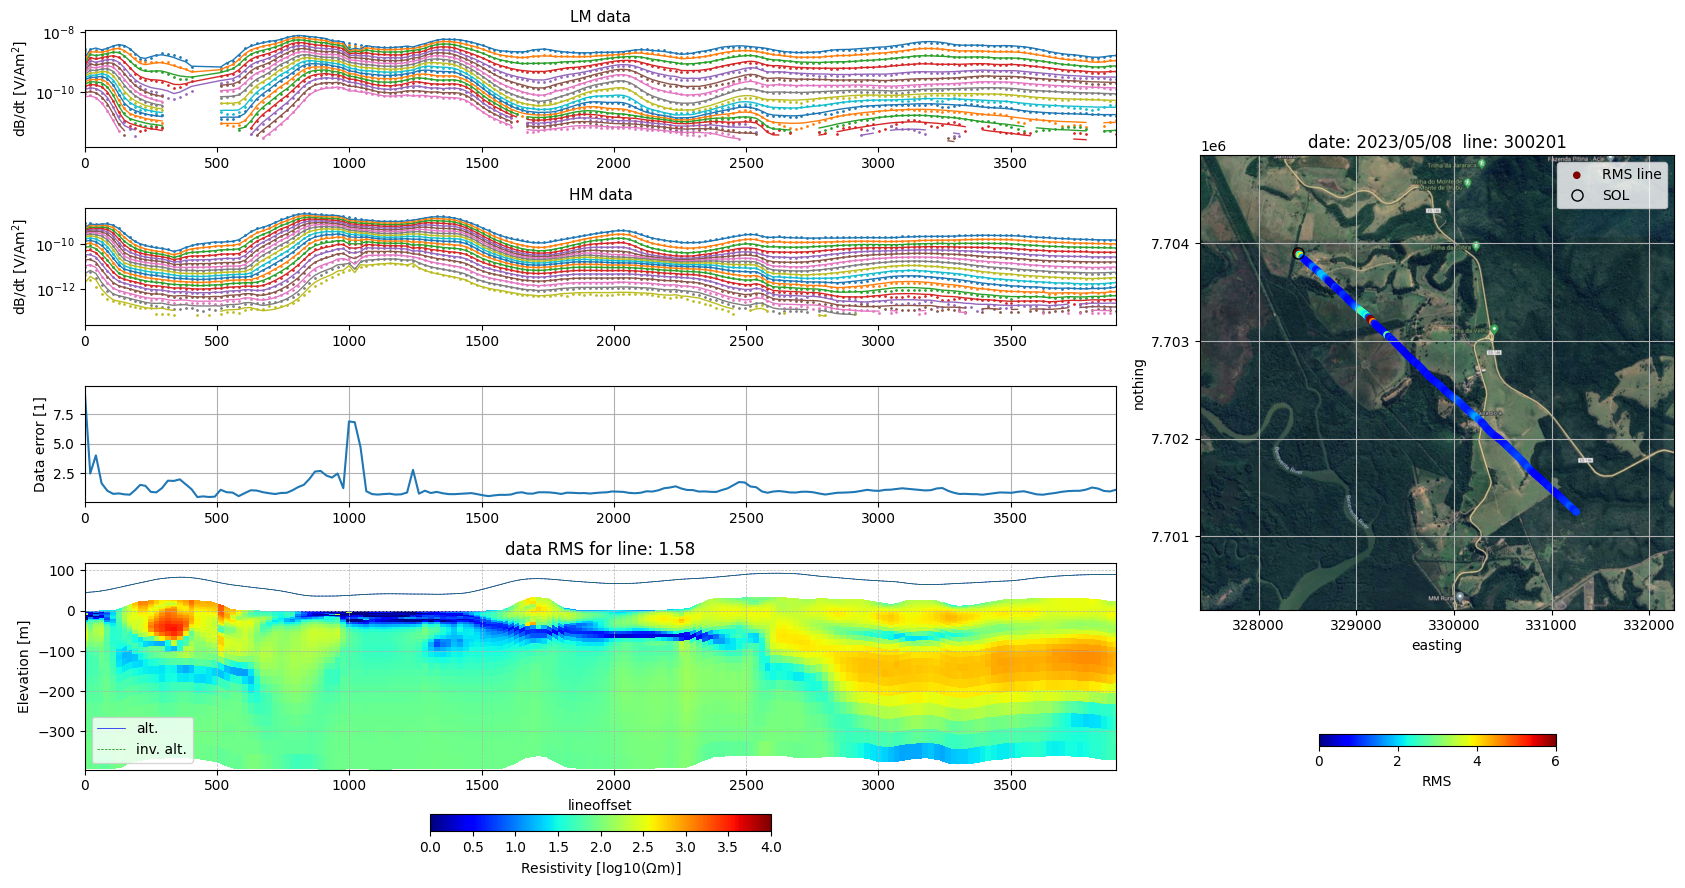

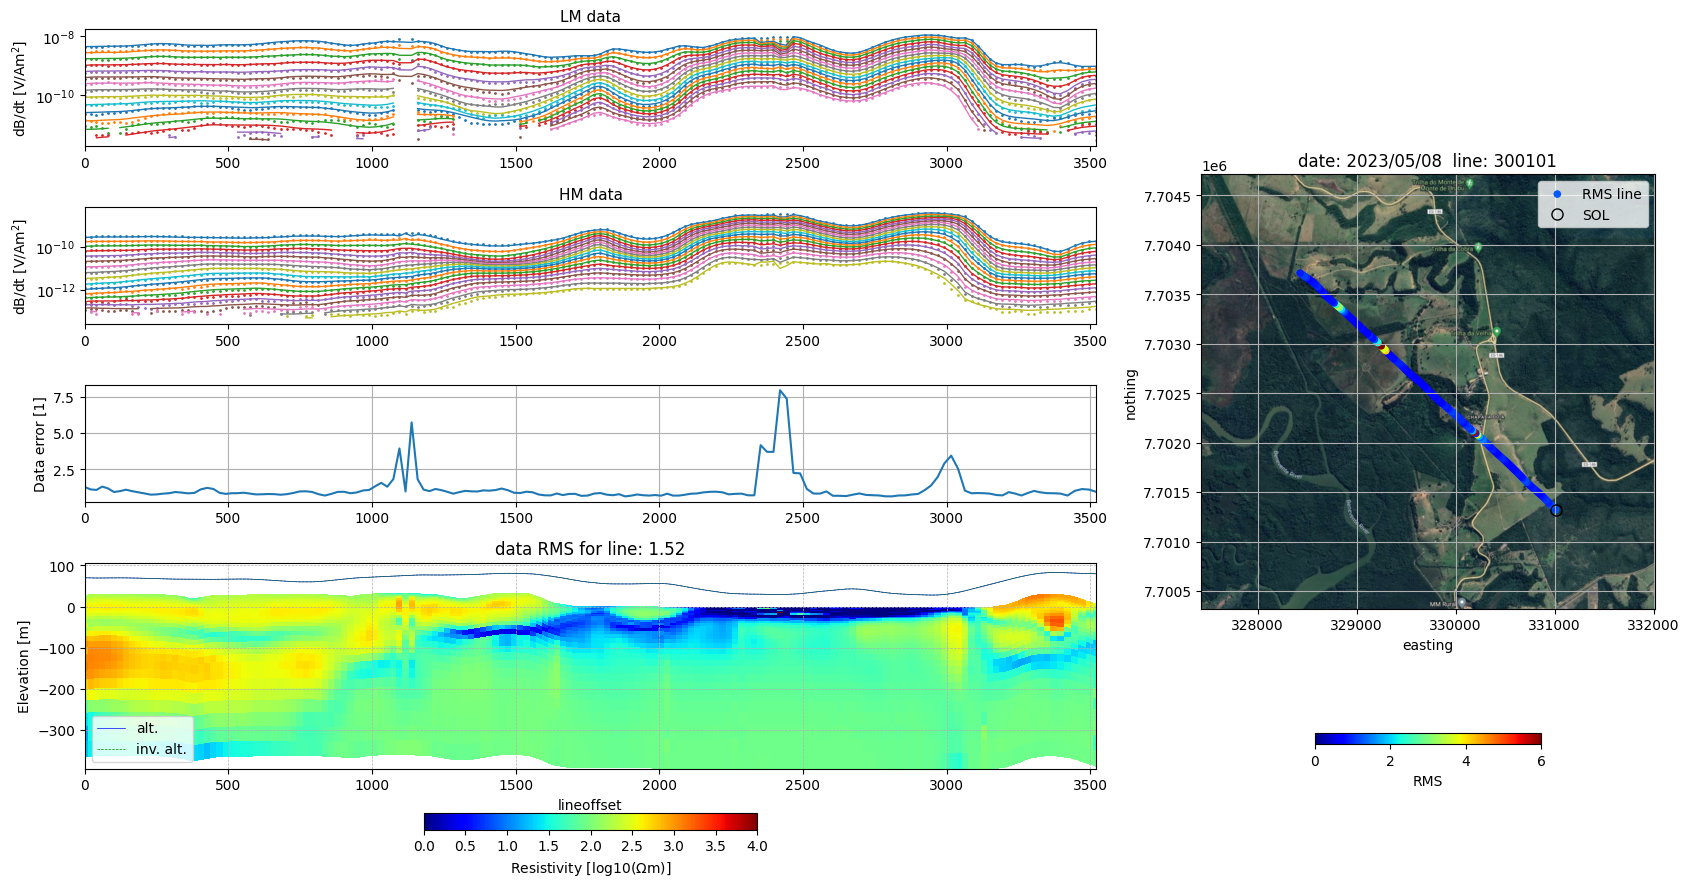

In [60]:

for line in modelLines.keys():
    basemap='http://mt0.google.com/vt/lyrs=y&hl=en&x={x}&y={y}&z={z}'
    crs=31984
    fig, ax = inversionQCplot(modelLines[line], obsLines[line], synthLines[line], xkey='lineoffset', basemap=basemap, crs=crs, plot_doi=False)
    ax['D'].set_title('date: {0}  line: {1}'.format(modelLines[line]['flightlines'].Date.unique()[0], line))
    #ax['C'].set_xlim((4000,6000))
